# **Clustering Assignment**

# **Assignment 7(a)**

# ***1.Crime Dataset(crime_data.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# **Importing DataSet**

In [3]:
#importing dataset
df=pd.read_csv('crime_data.csv')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


# **Exploratory Data Analysis**

In [6]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
df.shape

(50, 5)

In [8]:
#checking missing values
(df.isna().sum())/len(df)*100

Unnamed: 0    0.0
Murder        0.0
Assault       0.0
UrbanPop      0.0
Rape          0.0
dtype: float64

In [9]:
#checking duplicates
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [11]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [14]:
#rename
df.rename(columns={'Unnamed: 0':'Area'},inplace=True)
df

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [15]:
df.head()

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# **Correlation**

In [16]:
#correlation
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


# **Visualization**

# **Heatmap**

<Axes: >

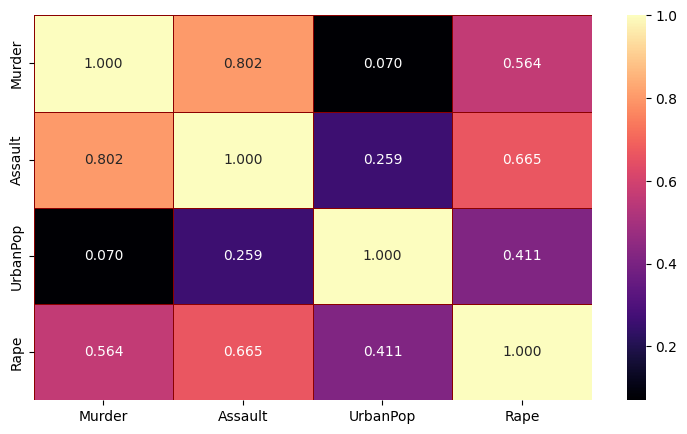

In [17]:
#heatmap
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,fmt='.3f',cmap='magma',linecolor='darkred',linewidth=0.5)

# **Pairplot**

<Figure size 300x500 with 0 Axes>

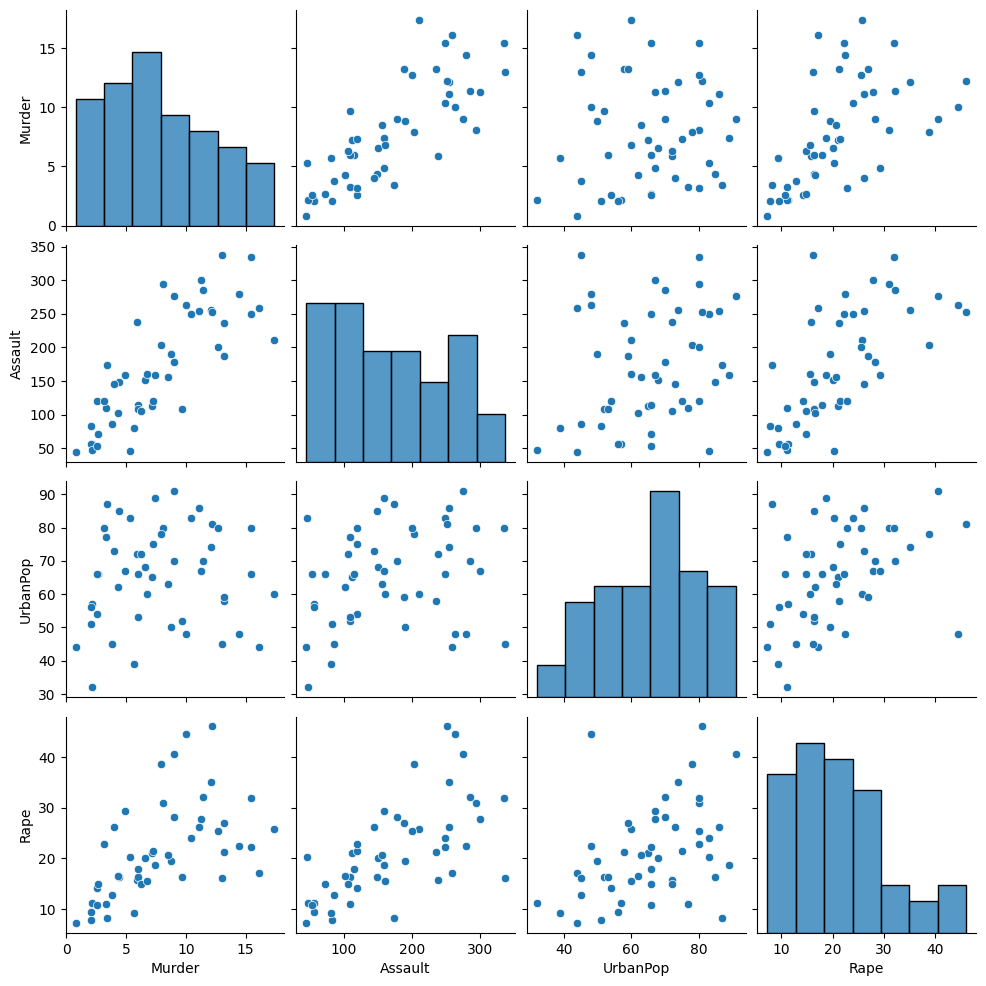

In [18]:
#pairplot
plt.figure(figsize=(3,5))
sns.pairplot(df)

# **Histogram**

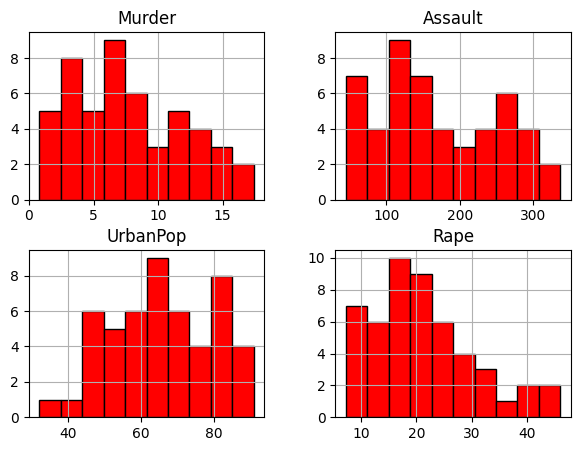

In [19]:
#histogram
df.hist(figsize=(7,5),color='red',edgecolor='black',rwidth=1)
plt.show()

# **Densityplot**

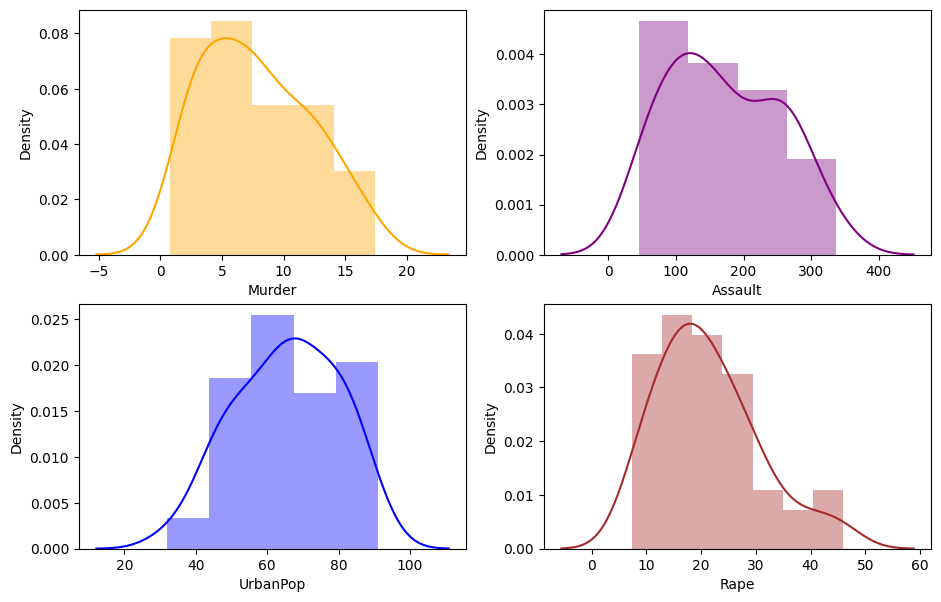

In [20]:
#density plot
plt.figure(figsize=(11,7))
plt.subplot(221)
sns.distplot(df['Murder'],color='orange')
plt.subplot(222)
sns.distplot(df['Assault'],color='purple')
plt.subplot(223)
sns.distplot(df['UrbanPop'],color='blue')
plt.subplot(224)
sns.distplot(df['Rape'],color='brown')
plt.show()

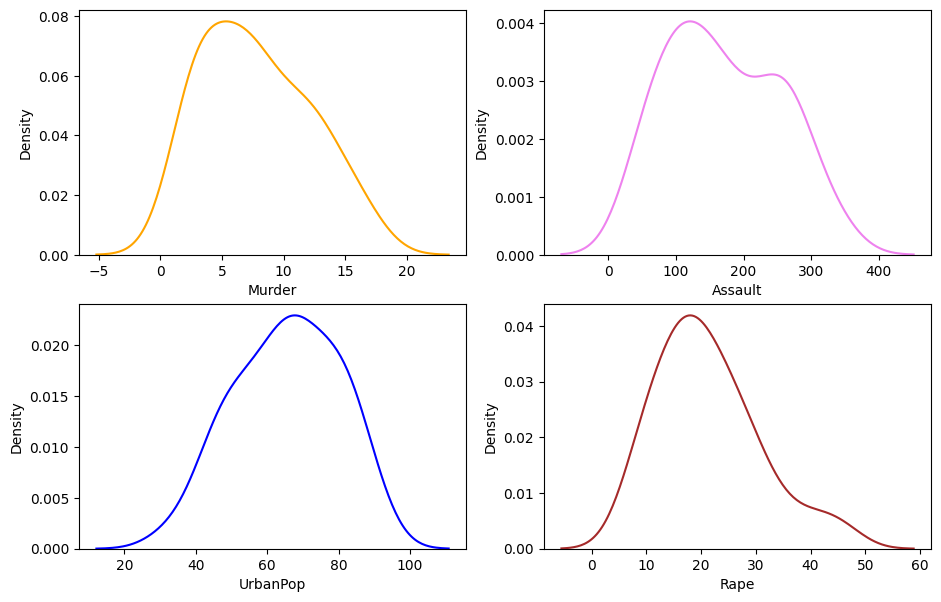

In [21]:
#kde plot
plt.figure(figsize=(11,7))
plt.subplot(221)
sns.kdeplot(df['Murder'],color='orange')
plt.subplot(222)
sns.kdeplot(df['Assault'],color='violet')
plt.subplot(223)
sns.kdeplot(df['UrbanPop'],color='blue')
plt.subplot(224)
sns.kdeplot(df['Rape'],color='brown')
plt.show()

# **Boxplot**

<Axes: >

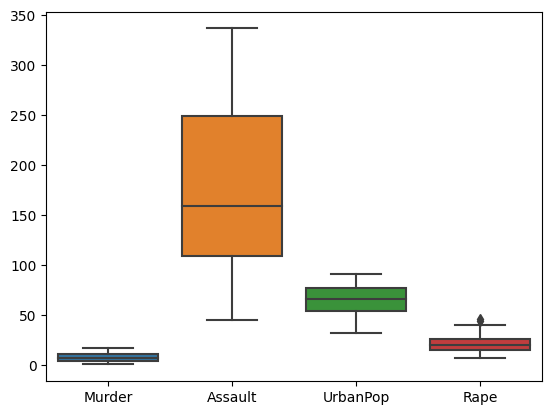

In [22]:
#boxplot
sns.boxplot(df)

# **Standardization**

In [23]:
#we have to standardize the data
df[['Murder', 'Assault', 'UrbanPop', 'Rape']]=sc.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [24]:
df.head()

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [25]:
df_norm=df.iloc[:,1:]

In [26]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# **Hierarchical clustering**

In [27]:
#dendrogram
import scipy.cluster.hierarchy as sch

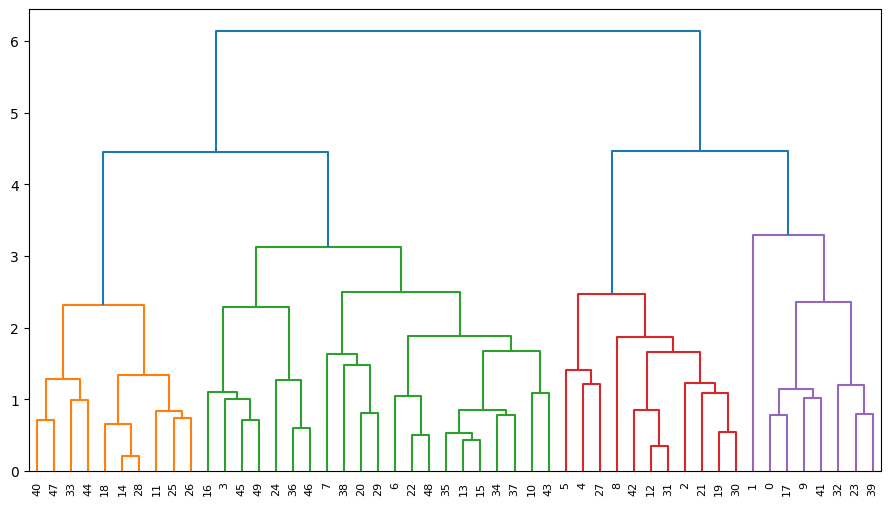

In [28]:
plt.figure(figsize=(11,6))
sch.dendrogram(sch.linkage(df_norm,method='complete'))
plt.show()

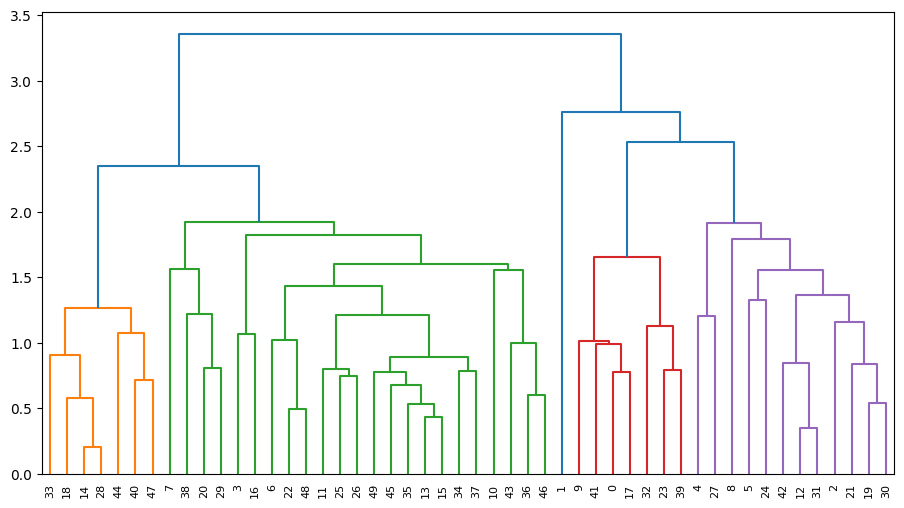

In [29]:
plt.figure(figsize=(11,6))
sch.dendrogram(sch.linkage(df_norm,method='average'))
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
#hierarchical clusturing
ac=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')  #intialization
ac.fit(df_norm)                                                                  #fitting
pred=ac.fit_predict(df_norm)                                                     #prediction
pred

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0])

In [32]:
df['cluster']=pred

In [33]:
df1=df.sort_values('cluster')

In [34]:
df1.head()

,Area,Murder,Assault,UrbanPop,Rape,cluster
49,Wyoming,-0.229142,-0.118303,-0.386621,-0.607404,0
28,New Hampshire,-1.319191,-1.378908,-0.665769,-1.265281,0
34,Ohio,-0.113180,-0.615272,0.660186,0.018119,0
26,Nebraska,-0.808955,-0.833454,-0.247047,-0.510340,0
25,Montana,-0.414682,-0.748605,-0.875131,-0.521125,0


In [35]:
print(df1.to_string())

              Area    Murder   Assault  UrbanPop      Rape  cluster
49         Wyoming -0.229142 -0.118303 -0.386621 -0.607404        0
28   New Hampshire -1.319191 -1.378908 -0.665769 -1.265281        0
34            Ohio -0.113180 -0.615272  0.660186  0.018119        0
26        Nebraska -0.808955 -0.833454 -0.247047 -0.510340        0
25         Montana -0.414682 -0.748605 -0.875131 -0.521125        0
48       Wisconsin -1.203228 -1.427393  0.032102 -1.125078        0
35        Oklahoma -0.275527 -0.239515  0.171676 -0.132870        0
22       Minnesota -1.180036 -1.197090  0.032102 -0.682898        0
36          Oregon -0.669800 -0.142545  0.101889  0.870123        0
20   Massachusetts -0.785763 -0.263757  1.358058 -0.531910        0
37    Pennsylvania -0.345105 -0.784969  0.450825 -0.682898        0
18           Maine -1.319191 -1.063757 -1.014705 -1.448624        0
38    Rhode Island -1.017688  0.039273  1.497632 -1.394700        0
16        Kentucky  0.443441 -0.748605 -0.944918

In [36]:
df1[['Area','cluster']]

,Area,cluster
49,Wyoming,0
28,New Hampshire,0
34,Ohio,0
26,Nebraska,0
25,Montana,0
48,Wisconsin,0
35,Oklahoma,0
22,Minnesota,0
36,Oregon,0
20,Massachusetts,0


# **Kmeans Clustering**

In [37]:
data=pd.read_csv('crime_data.csv')

In [38]:
data_ori=data.copy()

In [39]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [40]:
data.rename(columns={"Unnamed: 0":'Area'},inplace=True)

In [41]:
data_ori=data.copy()

In [42]:
#we have to perform standardization

In [43]:
data.columns

Index(['Area', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [44]:
data[['Murder', 'Assault', 'UrbanPop', 'Rape']]=sc.fit_transform(data[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [45]:
data.head()

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [46]:
#now performing kmean

In [47]:
#kmean clustering
from sklearn.cluster import KMeans

In [48]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data.iloc[:,1:])
  wcss.append(kmeans.inertia_)

<Axes: >

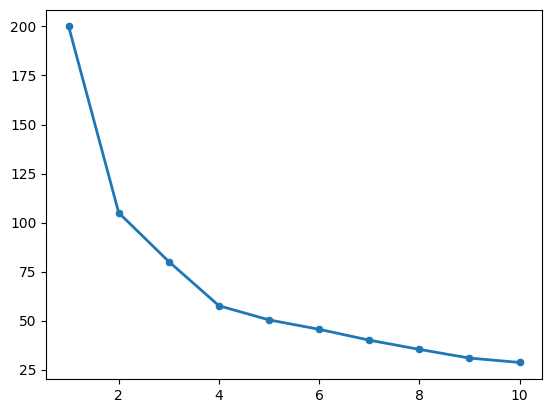

In [49]:
#elbow graph
wcss
sns.scatterplot(x=range(1,11),y=wcss)
sns.lineplot(x=range(1,11),y=wcss,linewidth=2)

In [50]:
#no of cluster are 4 from above scatter diagram

In [51]:
from sklearn.cluster import KMeans#initialization
kmeans=KMeans(n_clusters=4)
model=kmeans.fit(data.iloc[:,1:])   #fitting
pred=model.predict(data.iloc[:,1:])  #prediction

In [52]:
pred

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [53]:
data_ori['clusters']=pred

In [54]:
data_ori.sort_values('clusters',inplace=True)

In [55]:
kmeans.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [56]:
data_ori

,Area,Murder,Assault,UrbanPop,Rape,clusters
24,Missouri,9.0,178,70,28.2,0
31,New York,11.1,254,86,26.1,0
27,Nevada,12.2,252,81,46.0,0
21,Michigan,12.1,255,74,35.1,0
12,Illinois,10.4,249,83,24.0,0
30,New Mexico,11.4,285,70,32.1,0
19,Maryland,11.3,300,67,27.8,0
8,Florida,15.4,335,80,31.9,0
5,Colorado,7.9,204,78,38.7,0
4,California,9.0,276,91,40.6,0


In [57]:
dfkgroup=data_ori.groupby('clusters').mean().reset_index()

In [58]:
dfkgroup

,clusters,Murder,Assault,UrbanPop,Rape
0,0,10.815385,257.384615,76.000000,33.192308
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.656250,138.875000,73.875000,18.781250


In [59]:
model0=data[pred==0]
model1=data[pred==1]
model2=data[pred==2]
model3=data[pred==3]

In [60]:

dfkc=data.iloc[:,1:]
cols=dfkc.columns
cols

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

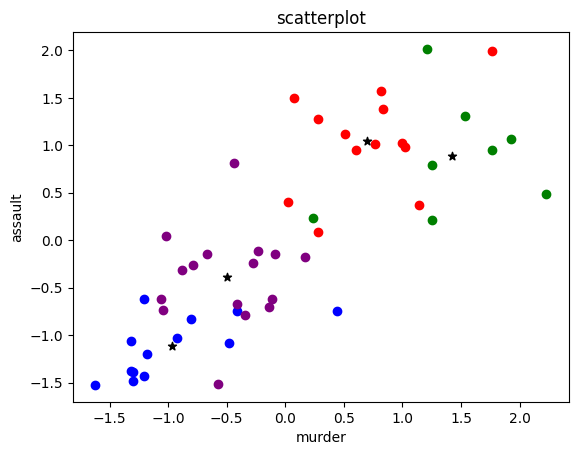

In [61]:
plt.scatter(model0[cols[0]],model0[cols[1]],c='red')
plt.scatter(model1[cols[0]],model1[cols[1]],c='blue')
plt.scatter(model2[cols[0]],model2[cols[1]],c='green')
plt.scatter(model3[cols[0]],model3[cols[1]],c='purple')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',marker='*')
plt.title('scatterplot')
plt.xlabel('murder')
plt.ylabel('assault')
plt.show()

In [62]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data.iloc[:,1:],pred)

0.33968891433344395

# **DBSCAN**

In [63]:
crime_data=pd.read_csv('/content/crime_data.csv')

In [64]:
crime_copy=crime_data.copy()

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [67]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [68]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [69]:
#Unnamed: 0 col is not required so drop the columns

In [70]:
crime_data.drop('Unnamed: 0',axis=1,inplace=True)

In [71]:
#now we have perform feature scaling with the help of standardscaler
crime_data.iloc[:,:]=sc.fit_transform(crime_data.iloc[:,:])

In [72]:
crime_data

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [73]:
from sklearn.neighbors import NearestNeighbors

In [74]:
nn=NearestNeighbors(n_neighbors=5)
nbrs=nn.fit(crime_data)
distances,indices=nbrs.kneighbors(crime_data)

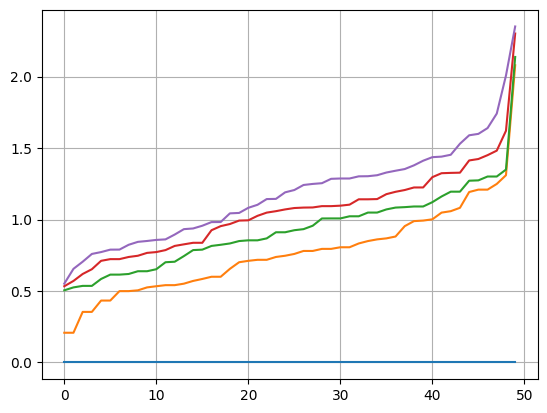

In [75]:
distances=np.sort(distances,axis=0)
#distances=distances[:,1]
plt.plot(distances)
plt.grid()

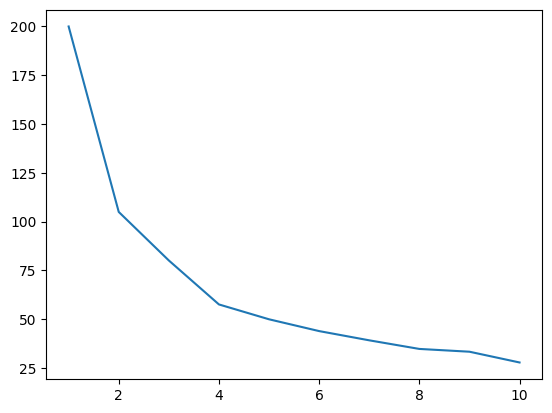

In [76]:
#elbow graph
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(crime_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

In [77]:
#no of cluster is 4

In [78]:
#DBSCAN
dbscan=DBSCAN(eps=1,min_samples=3)
dbscan.fit_predict(crime_data)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [79]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [80]:
crime_data1=crime_data.copy()

In [81]:
crime_data1['cluster']=dbscan.labels_

In [82]:
crime_data1

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,-1
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,-1
6,-1.040880,-0.736484,0.799761,-1.092723,1
7,-0.437875,0.815030,0.450825,-0.585834,-1
8,1.765415,1.990786,1.009122,1.150530,-1
9,2.229265,0.487757,-0.386621,0.492653,0


In [83]:
crime_data1.groupby('cluster').mean().reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
0,-1,0.410971,0.881696,0.367080,0.991992
1,0,1.661048,0.802908,-0.677401,0.149335
2,1,-0.687194,-0.711809,-0.152335,-0.552709
3,2,0.837714,0.774626,1.218484,0.427944
4,3,0.884099,1.324120,0.334513,1.125365


In [84]:
label0=crime_data1[dbscan.labels_==0]
label1=crime_data1[dbscan.labels_==1]
label2=crime_data1[dbscan.labels_==2]
label3=crime_data1[dbscan.labels_==3]
labelnoisy=crime_data1[dbscan.labels_==-1]

In [85]:
cols=crime_data1.columns
cols

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'cluster'], dtype='object')

Text(0, 0.5, 'Assault')

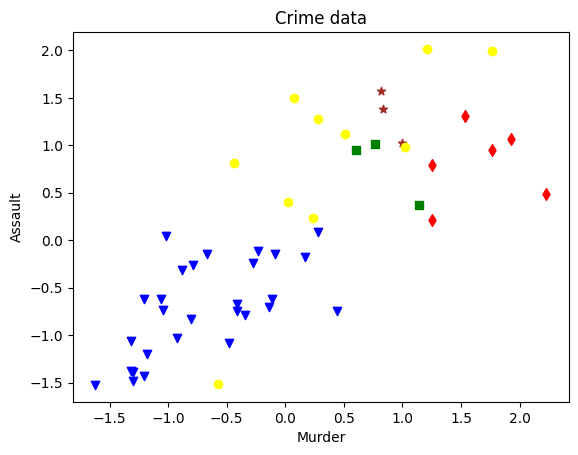

In [86]:
#plot between assault and murder
plt.scatter(label0[cols[0]],label0[cols[1]],c='red',marker='d')
plt.scatter(label1[cols[0]],label1[cols[1]],c='blue',marker='v')
plt.scatter(label2[cols[0]],label2[cols[1]],c='green',marker='s')
plt.scatter(label3[cols[0]],label3[cols[1]],c='brown',marker='*')
plt.scatter(labelnoisy[cols[0]],labelnoisy[cols[1]],c='yellow')
plt.title('Crime data')
plt.xlabel('Murder')
plt.ylabel('Assault')

In [87]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(crime_data,dbscan.labels_)

0.19290975823254836

In [88]:
#completed

# **completed**